# Probelm Statment

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

# importing neccesary libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as stat
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

# importing the dataset

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Exploratory data analysis

In [4]:
#cheking dimention of dataset
df.shape

(32560, 15)

dataset contain 32560 rows and 15 columns

In [5]:
#cheking type of dataset
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

As we can see there the datatype of income column is object it should either floate or int.

In [6]:
df['Income'].unique

<bound method Series.unique of 0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32555     <=50K
32556      >50K
32557     <=50K
32558     <=50K
32559      >50K
Name: Income, Length: 32560, dtype: object>

In [7]:
df['Income']

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32555     <=50K
32556      >50K
32557     <=50K
32558     <=50K
32559      >50K
Name: Income, Length: 32560, dtype: object

so we can see the type of data in the dataset some data is catogarical and some numerical.So we will encode it.

In [8]:
#to get good overviews of data set 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
#ets chek that either the data set contain null values or not
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

So as we can see there are no null values are present in data set.

<AxesSubplot:>

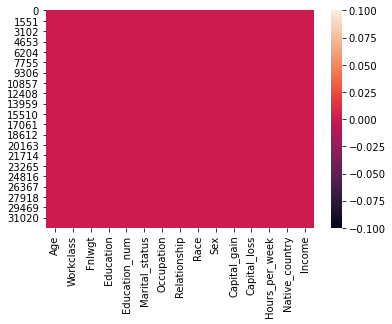

In [10]:
#since our dataset in cleaned that is no null value in the data set lets visualize this by heat map.
#Lets visualize null value clearly
sns.heatmap(df.isnull())

In [11]:
#cheking which columns are present in dataset
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [12]:
#list of values in target variable
df["Income"].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [13]:
#cheking weather the dataset contains any spaces
df.loc[df["Income"]== ""]

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


<AxesSubplot:xlabel='Workclass', ylabel='count'>

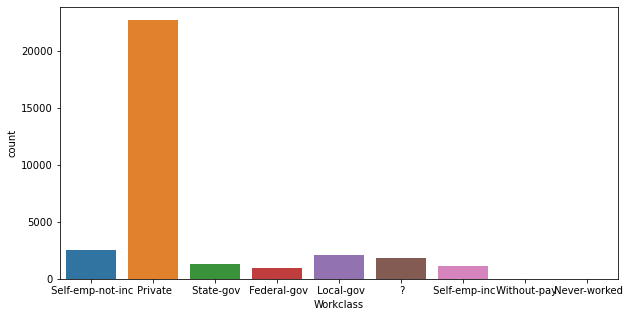

In [14]:
plt.figure(figsize= (10,5))
sns.countplot(df["Workclass"])

So we can see here most of the people are doing private job

<AxesSubplot:xlabel='Education', ylabel='count'>

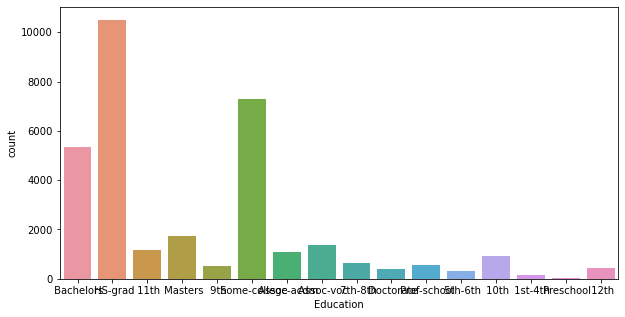

In [15]:
plt.figure(figsize= (10,5))
sns.countplot(df["Education"])

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

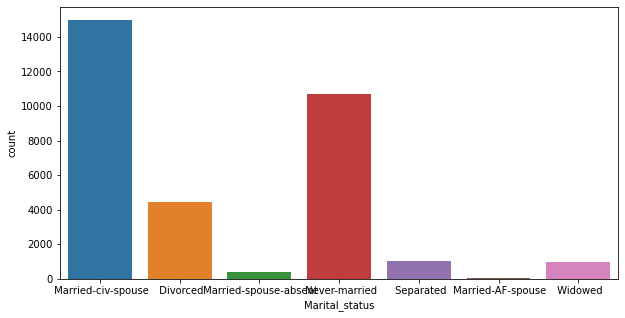

In [16]:
plt.figure(figsize= (10,5))
sns.countplot(df["Marital_status"])

<AxesSubplot:xlabel='Relationship', ylabel='count'>

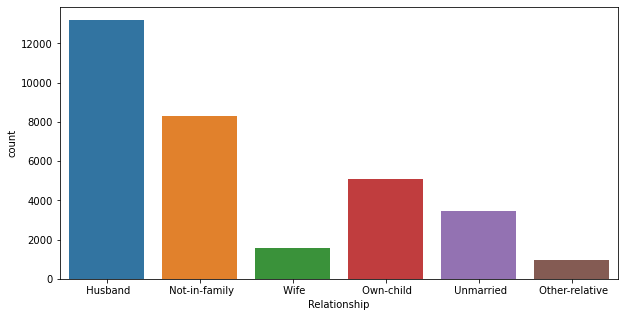

In [17]:
plt.figure(figsize= (10,5))
sns.countplot(df["Relationship"])

<AxesSubplot:xlabel='Race', ylabel='count'>

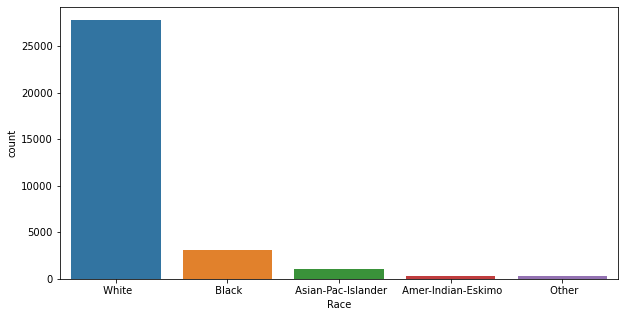

In [18]:
plt.figure(figsize= (10,5))
sns.countplot(df["Race"])

<AxesSubplot:xlabel='Sex', ylabel='count'>

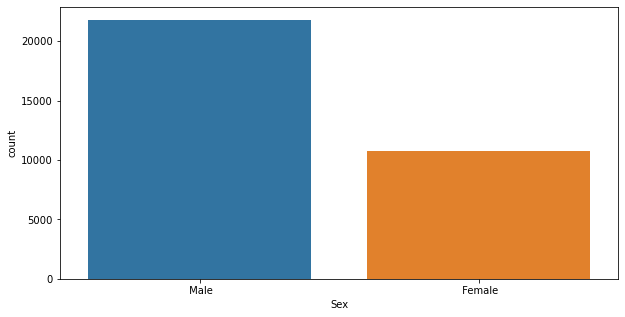

In [19]:
plt.figure(figsize= (10,5))
sns.countplot(df["Sex"])

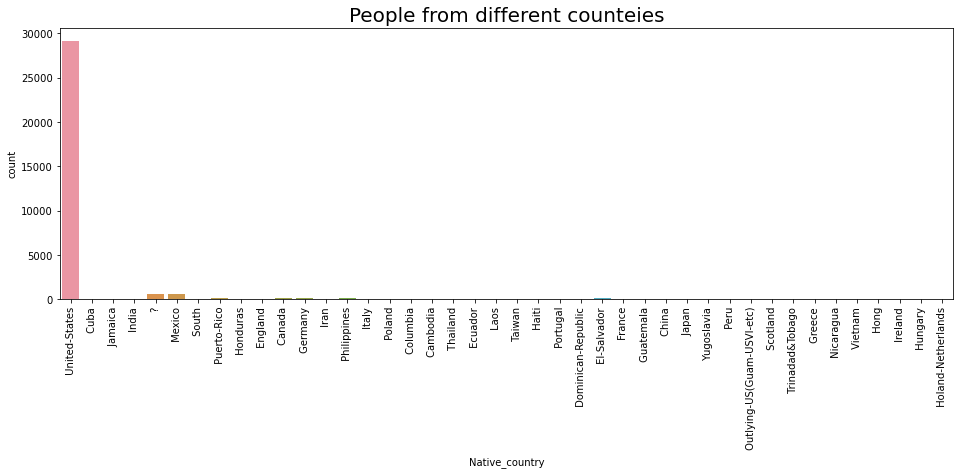

In [20]:
plt.figure(figsize= (16,5))
ax = sns.countplot(x="Native_country" , data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("People from different counteies", fontsize = 20)
plt.show()

<AxesSubplot:xlabel='Income', ylabel='count'>

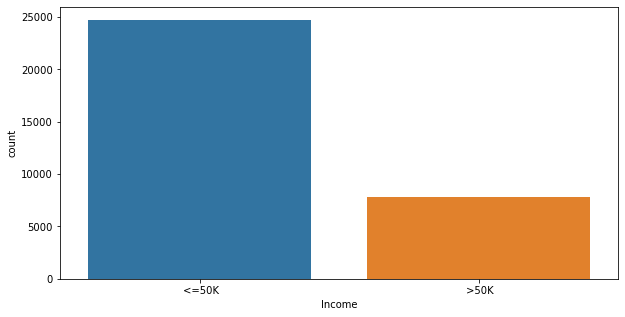

In [21]:
plt.figure(figsize= (10,5))
sns.countplot(df["Income"])

as we can see that most of the people are earning <=50k and some are >50k .

# Bi Vriate analysis

<AxesSubplot:xlabel='Income', ylabel='Age'>

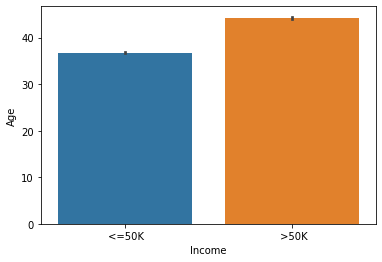

In [22]:
sns.barplot(x= 'Income', y = 'Age', data=df)

we can see people whoes age is less than 40 theier income is <=50k and who are more than 40 their income >50k

<AxesSubplot:xlabel='Income', ylabel='Education_num'>

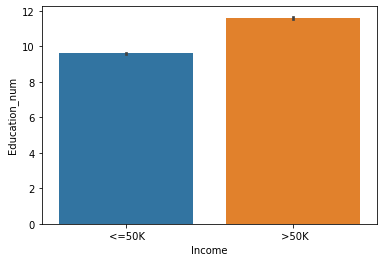

In [23]:
sns.barplot(x= 'Income', y = 'Education_num', data=df)

Education num is less than 10 then the income is <=50k and if more than 10 then the income is >50k

<AxesSubplot:xlabel='Income', ylabel='Capital_gain'>

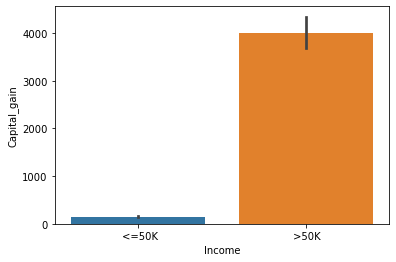

In [24]:
sns.barplot(x= 'Income', y = 'Capital_gain', data=df)

<AxesSubplot:xlabel='Income', ylabel='Capital_loss'>

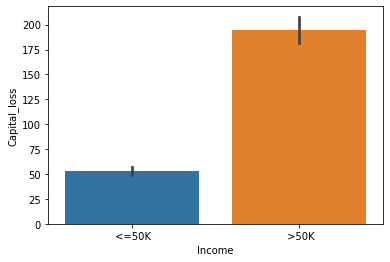

In [25]:
sns.barplot(x= 'Income', y = 'Capital_loss', data=df)

If capital loss is less than 50 then <=50k if it is more than 50 then income is >50k

<AxesSubplot:xlabel='Income', ylabel='Hours_per_week'>

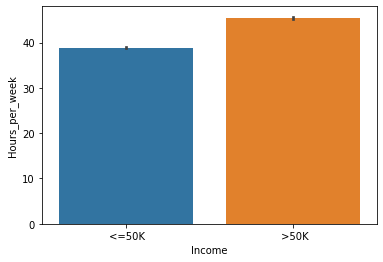

In [26]:
sns.barplot(x= 'Income', y = 'Hours_per_week', data=df)

If Hours per week are less than 40 then income is <=50k and income is more than 40 >50k 

In [27]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


 Capital_gain amd Capital_loss has min,250% , 50% , 75% are zero .There is much differnce in columns so we will do scaling.

In [28]:
label_list=list(df.select_dtypes(['object']).columns)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in label_list:
    df[i]= le.fit_transform(df[i])               

In [29]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0


In [30]:
df= df.sample(frac=1, random_state = 0)

# Multivariate Analysis

In [31]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.076646,-0.010508,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
Education,-0.010508,0.023537,-0.028156,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291,0.079311
Education_num,0.036527,0.052015,-0.043159,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
Marital_status,-0.266292,-0.064798,0.028184,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.001554,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995


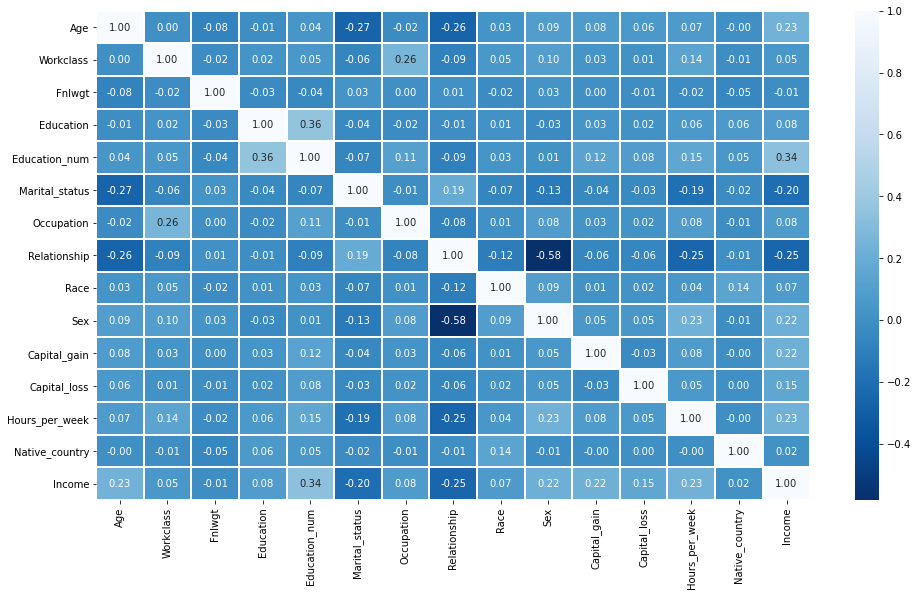

In [32]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),linewidths =1 ,fmt ='0.2f',cmap="Blues_r", annot=True )
plt.yticks(rotation=0);

We can clearly say that there is not much correlatin,even though education num have corelation of 34%

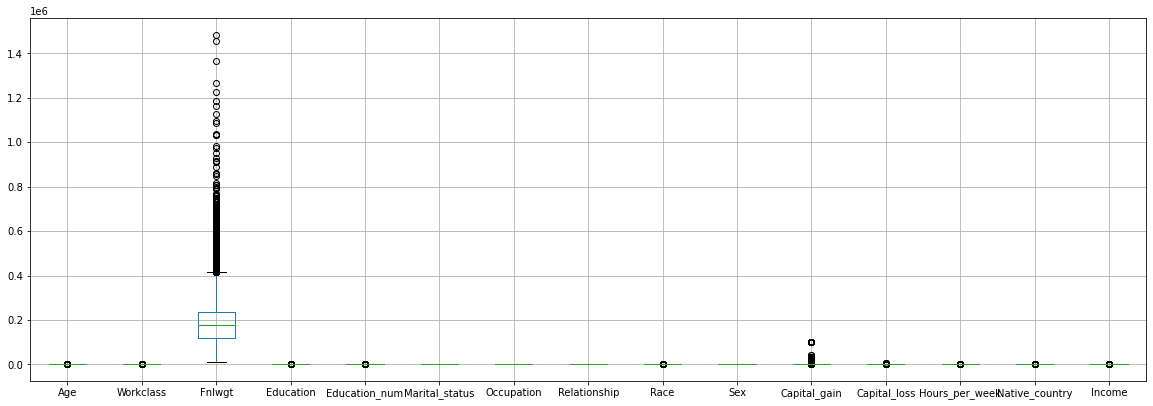

In [33]:
df.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [34]:
from scipy.stats import zscore 
z=np.abs(zscore(df))
print(np.where(z>3))

(array([    2,     4,     6, ..., 32539, 32547, 32551], dtype=int64), array([13, 12, 13, ...,  8, 10,  8], dtype=int64))


In [35]:
df1=df[(z<3).all(axis = 1)]
print(df.shape)
print(df1.shape)

(32560, 15)
(27417, 15)


In [36]:
df1=df[(z<3).all(axis =1)]
print(df.shape)
print(df1.shape)

(32560, 15)
(27417, 15)


In [37]:
loss_percent=(32559-27769)/32559*100
print(loss_percent)

14.7117540465002


In [38]:
loss_percent = (32560 - 27417)/32560*100
print(loss_percent)

15.795454545454547


15.79% data we have to drop but it is not good to dro this much amount of data

In [39]:
x= df.drop("Income", axis=1)
y= df["Income"]

In [40]:
x.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
dtype: float64

Columns have skewness we will remove it .

In [41]:
int_list=list(df.select_dtypes(['int64']).columns)

In [42]:
int_list=list(df.select_dtypes(['int64']).columns)

In [43]:
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
for i in int_list:
    if abs(x.loc[:,i].skew())>0.55:
        x.loc[:,i]=PT.fit_transform(x.loc[:,i].values.reshape(-1,1))

# Scaling

In [44]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
new = scale.fit(x)
scale_x = new.transform(x)

scaled_x = pd.DataFrame(x)
x=scaled_x
x.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
22278,0.247374,5,0.197870,15,10,2,5,0,4,1,-0.30137,-0.221213,40,39
8950,0.648173,4,0.145912,15,10,4,4,4,4,0,-0.30137,-0.221213,45,39
7838,-0.288442,0,0.280885,5,4,5,0,1,4,1,-0.30137,-0.221213,40,13
16505,-1.475970,4,0.114575,15,10,4,1,3,4,0,-0.30137,-0.221213,16,39
19140,1.386254,4,-0.757171,5,4,2,8,5,4,0,-0.30137,-0.221213,99,39


# Checking in Random state

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,auc
import warnings
warnings.filterwarnings('ignore')
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu,"on Random_state",maxRS)

Best accuracy is  0.822993447993448 on Random_state 142


In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size= .30,random_state=maxRS)

In [47]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [48]:
model = [LogisticRegression(),KNeighborsClassifier(),BernoulliNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('accuracy score of ->',m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m,x,y,cv=5)
    print(score)
    print(score.mean())
    print("Difference between Accuracy score and cross validation score is  - ", accuracy_score(y_test,pred)-score.mean())

accuracy score of -> LogisticRegression()
0.822993447993448
[[6986  497]
 [1232 1053]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      7483
           1       0.68      0.46      0.55      2285

    accuracy                           0.82      9768
   macro avg       0.76      0.70      0.72      9768
weighted avg       0.81      0.82      0.81      9768

[0.81035012 0.81388206 0.814957   0.81280713 0.81234644]
0.8128685503685503
Difference between Accuracy score and cross validation score is  -  0.010124897624897655
accuracy score of -> KNeighborsClassifier()
0.8127559377559378
[[6642  841]
 [ 988 1297]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      7483
           1       0.61      0.57      0.59      2285

    accuracy                           0.81      9768
   macro avg       0.74      0.73      0.73      9768
weighted avg       0.81      0.81      0.81      9768

[0.8

In [49]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {"max_depth":[1,2,3,4,5,6,7,8,9,10,15,20],
              "max_features": [3,5,7,9],
              "min_samples_leaf":[2,3,4,5,6]}
clf = RandomizedSearchCV(RandomForestClassifier(),parameters)
clf.fit(x_train,y_train) #fitting train and test data 
clf.best_params_ #Best parameters

{'min_samples_leaf': 2, 'max_features': 3, 'max_depth': 15}

In [50]:
clf_pred=clf.best_estimator_.predict(x_test)

In [51]:
accuracy_score(y_test,clf_pred)

0.8631244881244882

In [52]:
print(accuracy_score(y_test,clf_pred))
print(confusion_matrix(y_test,clf_pred))
print(classification_report(y_test,clf_pred))

0.8631244881244882
[[7042  441]
 [ 896 1389]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      7483
           1       0.76      0.61      0.68      2285

    accuracy                           0.86      9768
   macro avg       0.82      0.77      0.79      9768
weighted avg       0.86      0.86      0.86      9768



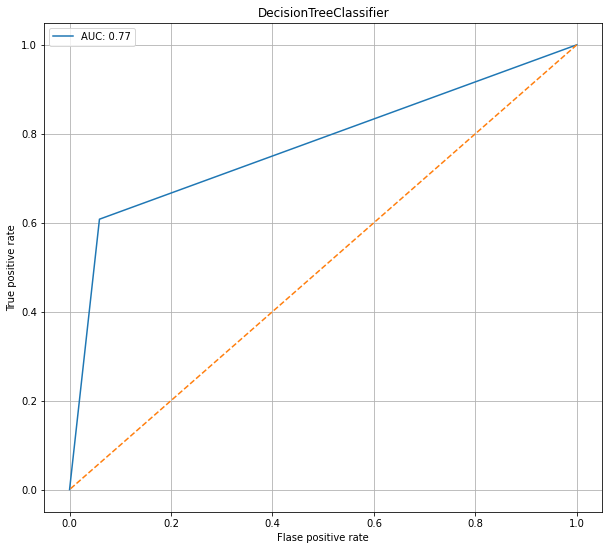

In [53]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
#calculating fpr, tpr
fpr,tpr,thresholds=roc_curve(y_test,clf_pred)
# Model accuracy
rf_auc = auc(fpr, tpr)
#plotting the figure, size of 10*9
plt.figure(figsize=(10,9))
plt.plot(fpr, tpr, label = 'AUC: %0.2f' % rf_auc)
plt.plot([1,0],[1,0], linestyle = '--')
plt.legend(loc=0)
plt.xlabel('Flase positive rate')
plt.ylabel('True positive rate')
plt.title('DecisionTreeClassifier')
plt.grid()

In [54]:
import joblib
joblib.dump(clf.best_estimator_,"Census.obj")
SVR_from_joblib=joblib.load("Census.obj")
Predicted = SVR_from_joblib.predict(x_test)
Predicted

array([0, 0, 0, ..., 0, 0, 0])

In [57]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.DataFrame([SVR_from_joblib.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

0     1     2     3     4     5     6     7     8     9     10    \
Predicted     0     0     0     0     0     0     1     1     1     0     0   
Original      0     0     0     0     0     0     1     1     1     0     0   

           11    12    13    14    15    16    17    18    19    20    21    \
Predicted     0     0     1     0     0     0     1     1     0     0     0   
Original      1     0     1     1     0     0     0     0     0     0     0   

           22    23    24    25    26    27    28    29    30    31    32    \
Predicted     0     1     0     0     0     0     0     0     1     1     0   
Original      0     1     0     1     0     0     1     0     1     1     0   

           33    34    35    36    37    38    39    40    41    42    43    \
Predicted     0     1     1     0     0     1     0     0     0     0     0   
Original      0     1     1     0     0     1     0     0     0     0     1   

           44    45    46    47    48    49    50    51    52    53    54    \
Predicted     0     0     0     0     0     0     0     0     0     0     0   
Original      0     1     0     0     0     0     0     0     0     0     0   

           55    56    57    58    59    60    61    62    63    64    65    \
Predicted     0     0     0     0     0     0     1     0     1     0     0   
Original      1     0     0     0     0     0     1     0     1     0     0   

           66    67    68    69    70    71    72    73    74    75    76    \
Predicted     0     0     0     0     0     1     1     0     0     0     0   
Original      0     1     0     0     0     1     1     0     0     0     0   

           77    78    79    80    81    82    83    84    85    86    87    \
Predicted     1     0     0     0     0     0     0     0     0     0     0   
Original      1     1     0     0     0     0     0     0     0     0     0   

           88    89    90    91    92    93    94    95    96    97    98    \
Predicted     0     1     1     0     1     0     0     0     0     0     0   
Original      0     1     1     0     1     0     0     1     0     0     1   

           99    100   101   102   103   104   105   106   107   108   109   \
Predicted     0     1     1     1     0     0     0     0     1     0     0   
Original      0     1     1     1     1     0     0     0     1     0     1   

           110   111   112   113   114   115   116   117   118   119   120   \
Predicted     0     0     0     0     0     1     0     0     0     0     0   
Original      0     0     0     0     0     0     0     0     1     0     0   

           121   122   123   124   125   126   127   128   129   130   131   \
Predicted     0     0     1     1     1     0     0     0     0     0     0   
Original      1     0     1     1     0     0     0     0     0     0     0   

           132   133   134   135   136   137   138   139   140   141   142   \
Predicted     0     0     0     1     0     0     1     0     0     0     0   
Original      0     0     1     0     0     0     0     0     0     1     0   

           143   144   145   146   147   148   149   150   151   152   153   \
Predicted     0     0     0     0     0     0     0     0     0     0     0   
Original      0     0     0     1     0     0     0     0     1     0     0   

           154   155   156   157   158   159   160   161   162   163   164   \
Predicted     1     0     0     0     0     0     1     1     0     1     0   
Original      0     0     0     0     0     0     1     1     0     1     0   

           165   166   167   168   169   170   171   172   173   174   175   \
Predicted     1     1     0     0     0     0     1     0     0     0     0   
Original      1     0     0     0     1     0     1     0     0     0     0   

           176   177   178   179   180   181   182   183   184   185   186   \
Predicted     0     0     0     0     0     0     0     0     1     0     0   
Original      0     0     0     0     0     0